In [2]:
import os
import pandas as pd

# 결과를 저장할 빈 리스트 생성
data_list = []

# 결과 파일이 있는 기본 경로
base_path = './results/results/'

# 폴더 순회 (0~5, 0~10, 0~15, 0~20, 0~100 순서대로 정렬)
for folder in sorted(os.listdir(base_path), key=lambda x: int(x.split('~')[1][:-1])):
    folder_path = os.path.join(base_path, folder)
    
    # 폴더 내의 txt 파일 순회
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # 파일 이름을 기반으로 모델 이름 추출
        model_name = file_name.split('_')[0]
        
        # 파일 내용 읽기
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # 값 추출
            mean_iou_score = float(lines[1].split(': ')[1].strip())
            
            # 리스트에 딕셔너리 추가
            data_list.append({'threshold': folder, 'model': model_name, 'iou_score': mean_iou_score})

# 리스트를 기반으로 데이터프레임 생성
df = pd.DataFrame(data_list)

# 결과 출력
print(df)
df.to_csv("model_metric_results.csv")

   threshold           model  iou_score
0      (0~5]  efficientnetb0    0.43424
1      (0~5]       mobilenet    0.43911
2      (0~5]       resnet101    0.43318
3      (0~5]           vgg19    0.41076
4      [0~5]  efficientnetb0    0.45559
5      [0~5]       mobilenet    0.43920
6      [0~5]       resnet101    0.43970
7      [0~5]           vgg19    0.41896
8     (0~10]  efficientnetb0    0.51707
9     (0~10]       mobilenet    0.50479
10    (0~10]       resnet101    0.52789
11    (0~10]           vgg19    0.46791
12    [0~10]  efficientnetb0    0.52895
13    [0~10]       mobilenet    0.52499
14    [0~10]       resnet101    0.51478
15    [0~10]           vgg19    0.48459
16    (0~15]  efficientnetb0    0.54319
17    (0~15]       mobilenet    0.52621
18    (0~15]       resnet101    0.54315
19    (0~15]           vgg19    0.49460
20    [0~15]  efficientnetb0    0.54919
21    [0~15]       mobilenet    0.53230
22    [0~15]       resnet101    0.54804
23    [0~15]           vgg19    0.49478


In [3]:
df = pd.read_csv("./model_metric_results.csv")

In [20]:
resnet101_df = df[df['model'] == 'PID-Net(background)']

# Display the resulting DataFrame
print(resnet101_df)

   threshold                model  iou_score
5      (0~5]  PID-Net(background)     0.7501
11     [0~5]  PID-Net(background)     0.7178
17    (0~10]  PID-Net(background)     0.7824
23    [0~10]  PID-Net(background)     0.8007
29    (0~15]  PID-Net(background)     0.8118
35    [0~15]  PID-Net(background)     0.8138
41    (0~20]  PID-Net(background)     0.8240
47    [0~20]  PID-Net(background)     0.8134
53   (0~100]  PID-Net(background)     0.8198
59   [0~100]  PID-Net(background)     0.8213


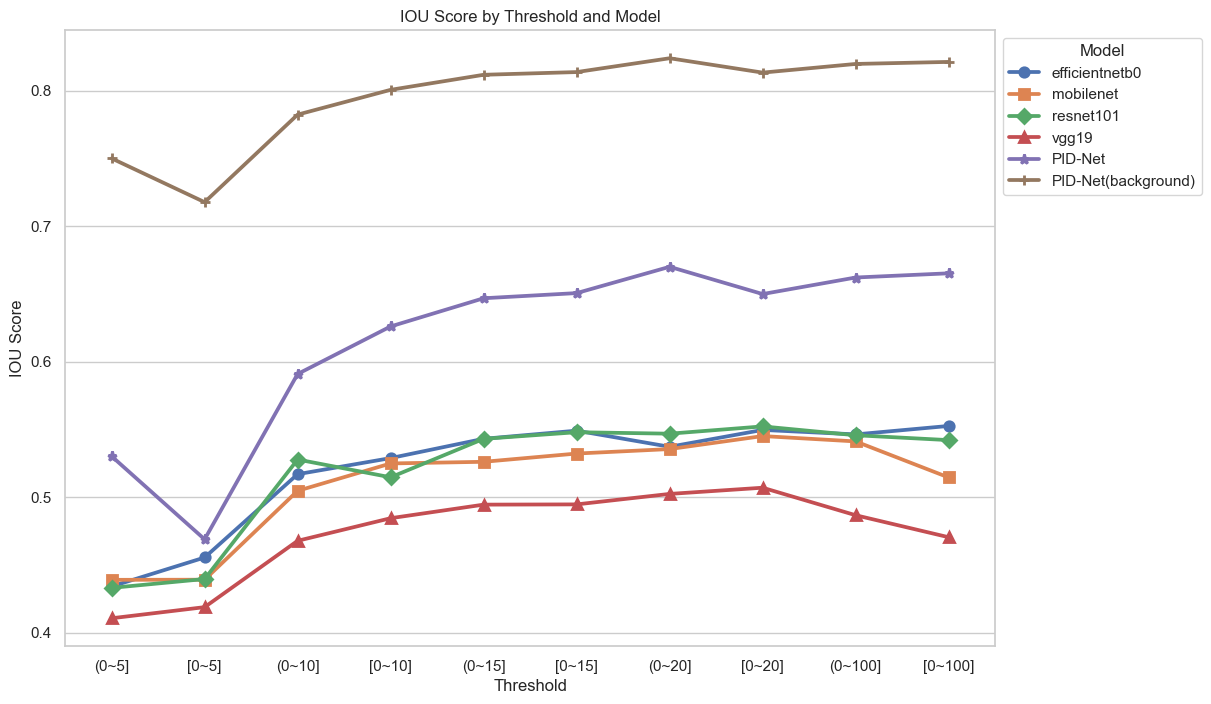

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming the data is stored in a DataFrame df
# If not, you can create a DataFrame using pd.DataFrame(your_data)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Use seaborn's pointplot to visualize IOU scores for each threshold and model
sns.pointplot(x='threshold', y='iou_score', hue='model', data=df, ax=ax, markers=['o', 's', 'D', '^', '*', '+'])

# Set labels and title
ax.set_xlabel('Threshold')
ax.set_ylabel('IOU Score')
ax.set_title('IOU Score by Threshold and Model')

# Show legend
ax.legend(title='Model', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

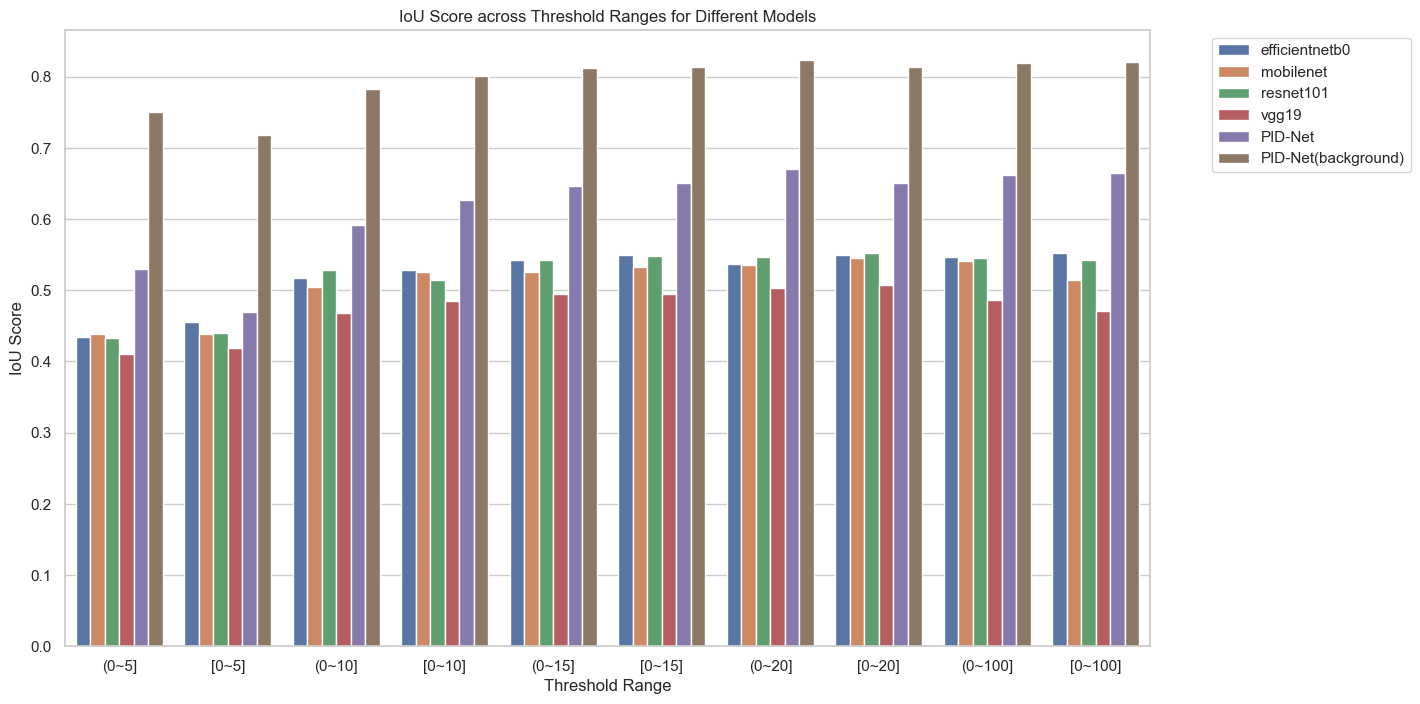

In [10]:
# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# 바플롯 그리기
sns.barplot(x='threshold', y='iou_score', hue='model', data=df)

# 그래프 타이틀 및 축 레이블 설정
plt.title('IoU Score across Threshold Ranges for Different Models')
plt.xlabel('Threshold Range')
plt.ylabel('IoU Score')

# 범례 위치 조정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.show()